In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct

from util import *
import motif_fit

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


86.40% variants passed the filter n_clusters > 5 & dG_37_se < 0.2 & Tm_se < 2.5 & dH_se < 2.5 & RMSE < 0.5
77.22% variants passed the filter n_clusters > 5 & dG_37_se < 0.2 & Tm_se < 2.5 & dH_se < 2.5 & RMSE < 0.5
76.77% variants passed the filter n_clusters > 5 & dG_37_se < 0.2 & Tm_se < 2.5 & dH_se < 2.5 & RMSE < 0.5


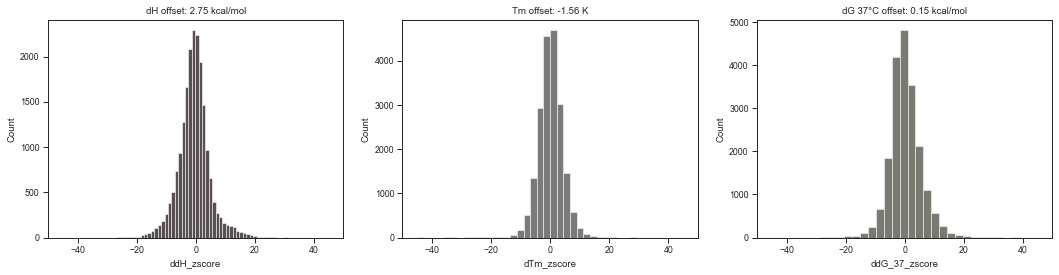

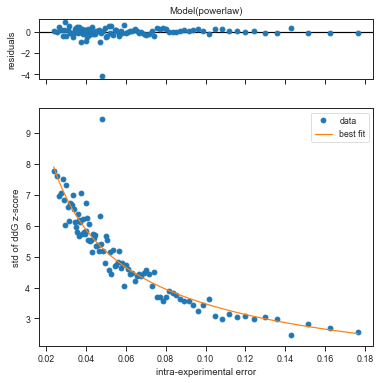

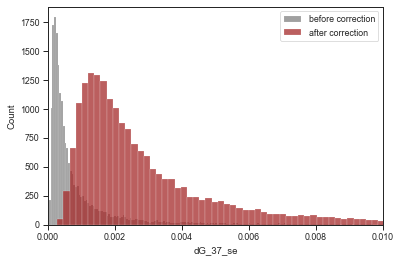

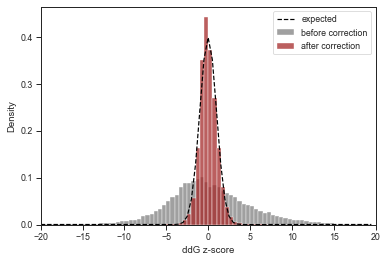

In [330]:
annotation = read_annotation('./data/annotation/NNNlib2b_annotation_nupack.txt',
                             './data/annotation/NNN_mastertable.tsv')
santa_lucia = read_santalucia_df('./data/literature/SantaLucia.tsv')
r1 = read_fitted_variant('./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz')
r2 = read_fitted_variant('./data/fitted_variant/NNNlib2b_DNA_20211221_v6.CPvariant.gz')
r3 = read_fitted_variant('./data/fitted_variant/NNNlib2b_DNA_20211223_v6.CPvariant.gz')
conds2 = [x for x in r2.columns if x.endswith('_norm')][:-1]
conds3 = [x for x in r3.columns[::-1] if x.endswith('_norm')][:-1]

df = combine_and_correct_interexperiment_error(r2, r3)
df = df.join(annotation, how='inner')

df['TargetStruct'] = ['('*int((len(x)-4)/2)+'....'+')'*int((len(x)-4)/2) for x in df['RefSeq']]


In [332]:
df = df.query('ConstructClass == "Watson Crick"')

Text(0, 0.5, 'dG at 37°C, MANIfold (kcal/mol)')

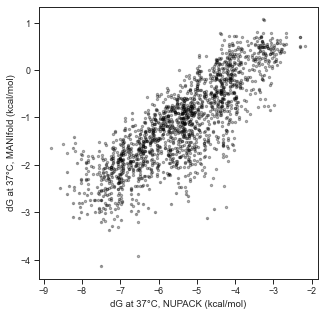

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
plt.errorbar(df['dG_37_NUPACK'],df['dG_37'],yerr=df['dG_37_se'], alpha=0.3,color='k', fmt='.')
plt.xlabel('dG at 37°C, NUPACK (kcal/mol)')
plt.ylabel('dG at 37°C, MANIfold (kcal/mol)')


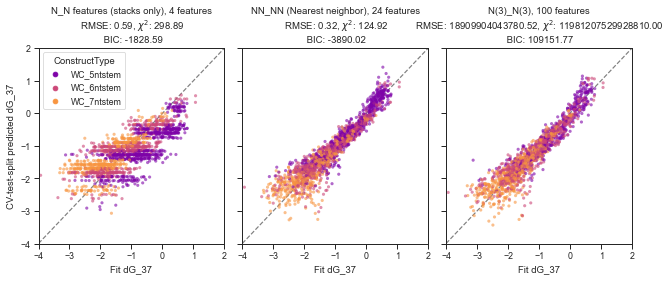

In [11]:
dG_dfs = motif_fit.fit_linear_motifs(df, param='dG_37', lim=[-4, 2])

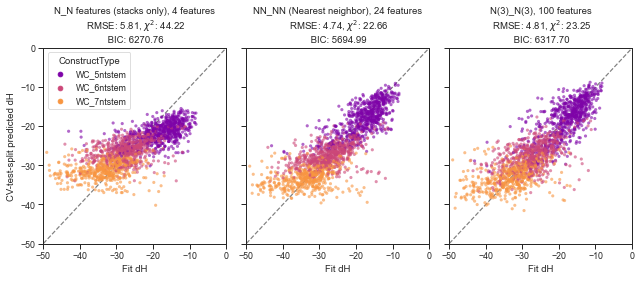

In [117]:
coef_dfs = motif_fit.fit_linear_motifs(df, param='dH', err='_se', lim=[-50,0], fit_intercept=False)

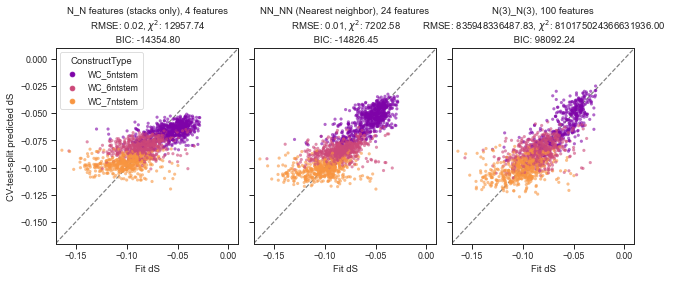

In [21]:
coef_dfs = motif_fit.fit_linear_motifs(df, param='dS', err='_se', lim=[-.17,.01], fit_intercept=False)

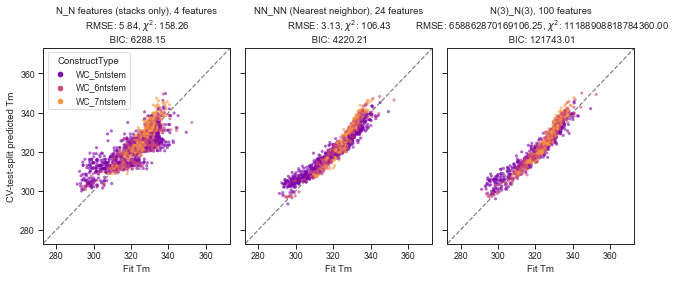

In [22]:
coef_dfs = motif_fit.fit_linear_motifs(df, param='Tm', err='_se', lim=[273,373], fit_intercept=True)

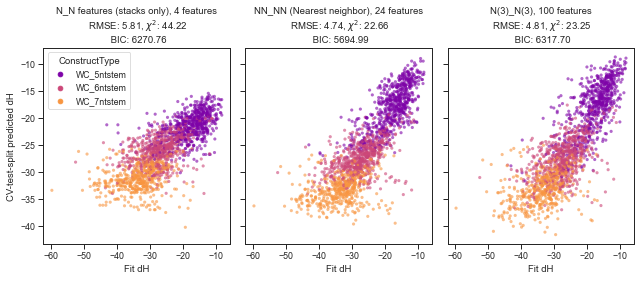

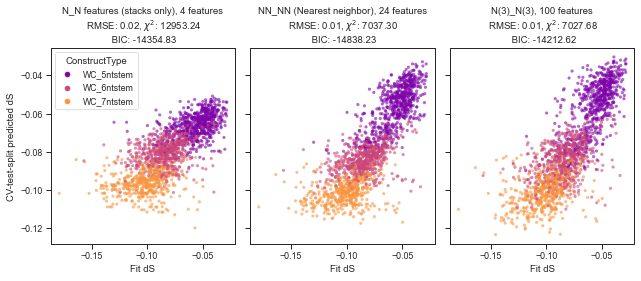

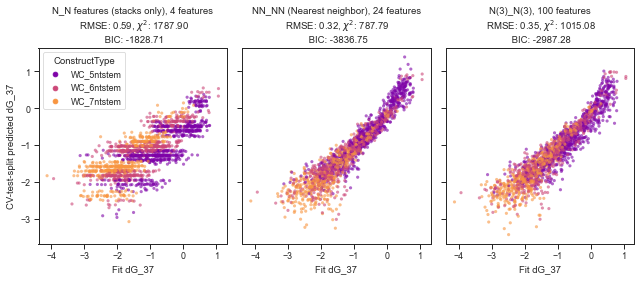

In [26]:
fit_vs_sl = motif_fit.compare_fit_with_santalucia(df, santa_lucia)

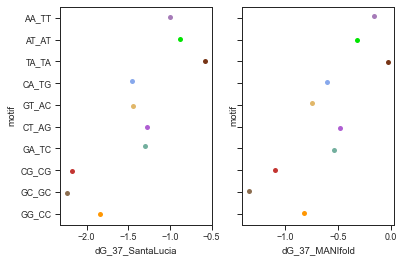

In [24]:
fig, ax = plt.subplots(1, 2, sharey=True)
sns.stripplot(data=fit_vs_sl, orient='h', y='motif', x='dG_37_SantaLucia', ax=ax[0], palette='cet_glasbey_dark')
sns.stripplot(data=fit_vs_sl, orient='h', y='motif', x='dG_37_MANIfold', ax=ax[1], palette='cet_glasbey_dark')
save_fig('./fig/motif_fit/WC_MANIfold_vs_SantaLucia_dG.pdf')

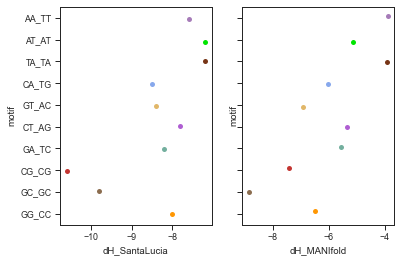

In [25]:
fig, ax = plt.subplots(1, 2, sharey=True)
sns.stripplot(data=fit_vs_sl, orient='h', y='motif', x='dH_SantaLucia', ax=ax[0], palette='cet_glasbey_dark')
sns.stripplot(data=fit_vs_sl, orient='h', y='motif', x='dH_MANIfold', ax=ax[1], palette='cet_glasbey_dark')
save_fig('./fig/motif_fit/WC_MANIfold_vs_SantaLucia_dH.pdf')

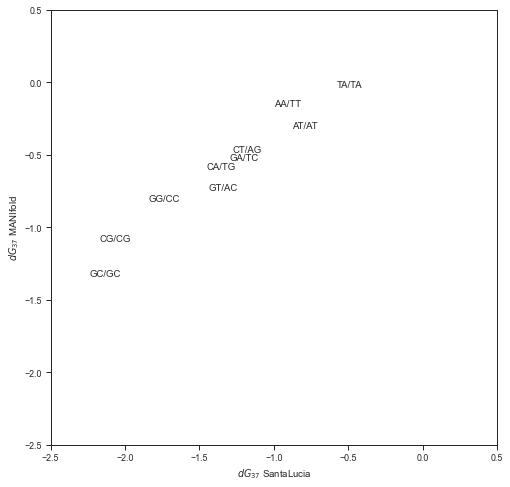

In [275]:
fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(fit_vs_sl)):
    plt.text(fit_vs_sl.dG_37_SantaLucia[i], fit_vs_sl.dG_37_MANIfold[i], fit_vs_sl.motif[i].replace('_','/'))
    
plt.xlim([-2.5,0.5])
plt.ylim([-2.5,0.5])

plt.xlabel('$dG_{37}$ SantaLucia')
plt.ylabel('$dG_{37}$ MANIfold')

save_fig('./fig/motif_fit/WC_MANIfold_vs_SantaLucia_dG_scatter.pdf')

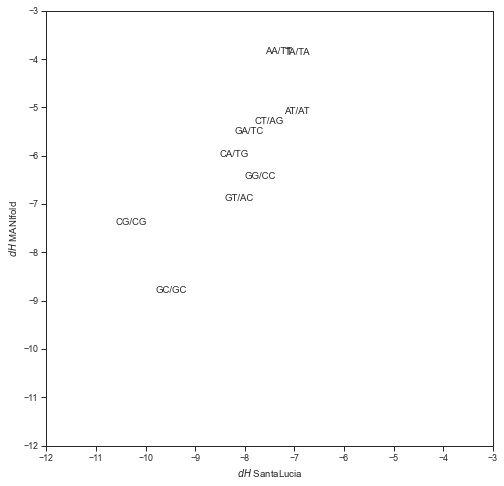

In [274]:
fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(fit_vs_sl)):
    plt.text(fit_vs_sl.dH_SantaLucia[i], fit_vs_sl.dH_MANIfold[i], fit_vs_sl.motif[i].replace('_','/'))
    
plt.xlim([-12,-3])
plt.ylim([-12,-3])

plt.xlabel('$dH$ SantaLucia')
plt.ylabel('$dH$ MANIfold')

save_fig('./fig/motif_fit/WC_MANIfold_vs_SantaLucia_dH_scatter.pdf')

## Choose constructs for validation

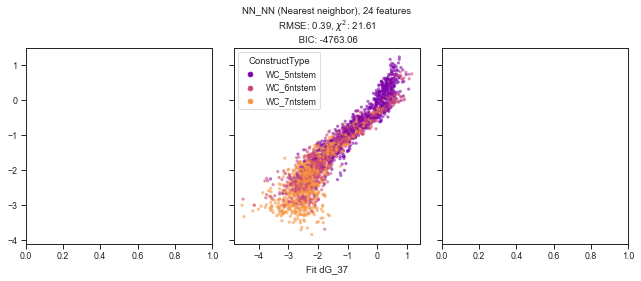

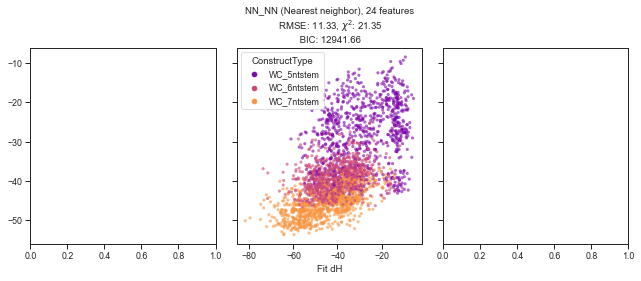

In [100]:
dG_df, feats, preds_dG, model = motif_fit.fit_linear_motifs(r1, stack_sizes=[2], param='dG_37', err='_se')
dH_df, _, preds_dH, _ = motif_fit.fit_linear_motifs(r1, stack_sizes=[2], param='dH', err='_se')

395.48403351106913
beta_hat = [ -7.30240976  -2.27852243  -5.72244944  -9.95084815  13.88129843
  11.61426732   3.26365233  -0.8807014    0.28543008  12.01835179
  25.34877688  12.04202878  -5.53647771  -1.3561537    8.64445027
  18.47771736  -9.96576521 -17.25403836 -14.75070463 -11.94800997
  -0.3231274    4.84912789  -1.95577432  -4.33526913   7.07713665]
SE(beta_hat[0]): nan
SE(beta_hat[1]): 0.021067306598793197
SE(beta_hat[2]): nan
SE(beta_hat[3]): 802991.2471680033
SE(beta_hat[4]): 570197.5202820294
SE(beta_hat[5]): nan
SE(beta_hat[6]): nan
SE(beta_hat[7]): 0.02235833238903626
SE(beta_hat[8]): nan
SE(beta_hat[9]): nan
SE(beta_hat[10]): nan
SE(beta_hat[11]): 802991.2471680008
SE(beta_hat[12]): nan
SE(beta_hat[13]): 0.019099122924704778
SE(beta_hat[14]): nan
SE(beta_hat[15]): 736315.8387058718
SE(beta_hat[16]): nan
SE(beta_hat[17]): nan
SE(beta_hat[18]): 736315.8387058742
SE(beta_hat[19]): 345392.6990789557
SE(beta_hat[20]): 0.020956624381963832
SE(beta_hat[21]): nan
SE(beta_hat[22

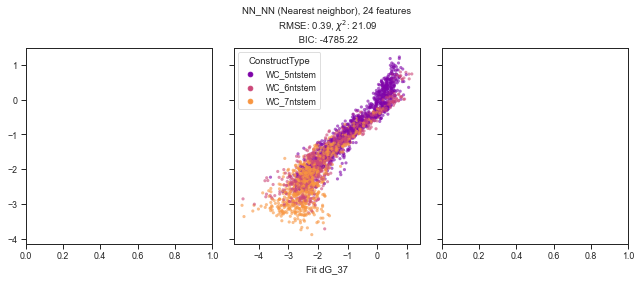

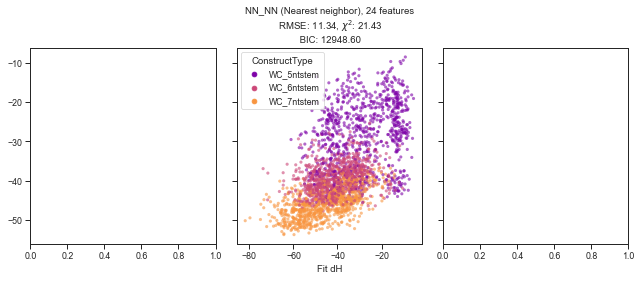

In [162]:
dG_df, feats, preds_dG, results = motif_fit.fit_linear_motifs(r1, stack_sizes=[2], param='dG_37', err='_se', fit_intercept=True)
dH_df, _, preds_dH, _ = motif_fit.fit_linear_motifs(r1, stack_sizes=[2], param='dH', err='_se', fit_intercept=True)

In [171]:
res = r1.dG_37 - preds_dG
XT_X_1 = np.linalg.inv(X.T @ X)
var_coef = XT_X_1 @ X.T @ np.diag(res**2) @ X @ XT_X_1
np.sqrt(np.diag(var_coef))

array([0.01898719, 0.03377829, 0.03697032, 0.06231249, 0.03363069,
       0.03246922, 0.02461845, 0.04420584, 0.06534525, 0.03728592,
       0.02015523, 0.02895632, 0.02023166, 0.08432655, 0.02721373,
       0.03333448, 0.03823398, 0.0417799 , 0.06541999, 0.0190123 ])

In [9]:
df['fit_vs_NUPACK_dG_37'] = df.dG_37 - df.dG_37_NUPACK
df['fit_vs_pred_dG_37'] = df.dG_37 - preds_dG
df['fit_vs_NUPACK_dH'] = df.dH - df.dH_NUPACK
df['fit_vs_pred_dH'] = df.dH - preds_dH

In [54]:
r1 = read_fitted_variant('./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz', annotation=annotation)
r1 = r1.query('ConstructClass == "Watson Crick"')
r1['TargetStruct'] = ['('*int((len(x)-4)/2)+'....'+')'*int((len(x)-4)/2) for x in r1['RefSeq']]
r1['fit_vs_NUPACK_dG_37'] = r1.dG_37 - r1.dG_37_NUPACK
r1['fit_vs_pred_dG_37'] = r1.dG_37 - preds_dG
r1['fit_vs_NUPACK_dH'] = r1.dH - r1.dH_NUPACK
r1['fit_vs_pred_dH'] = r1.dH - preds_dH

86.40% variants passed the filter n_clusters > 5 & dG_37_se < 0.2 & Tm_se < 2.5 & dH_se < 2.5 & RMSE < 0.5


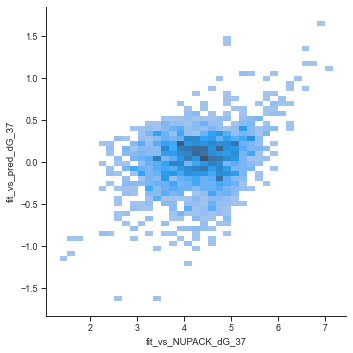

In [44]:
sns.displot(data=df, x='fit_vs_NUPACK_dG_37', y='fit_vs_pred_dG_37')

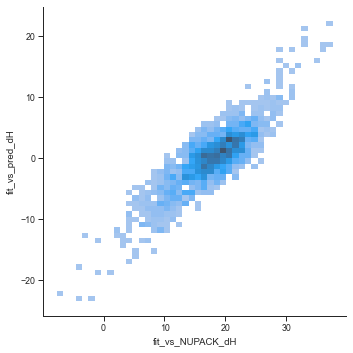

In [50]:
sns.displot(data=df, x='fit_vs_NUPACK_dH', y='fit_vs_pred_dH')

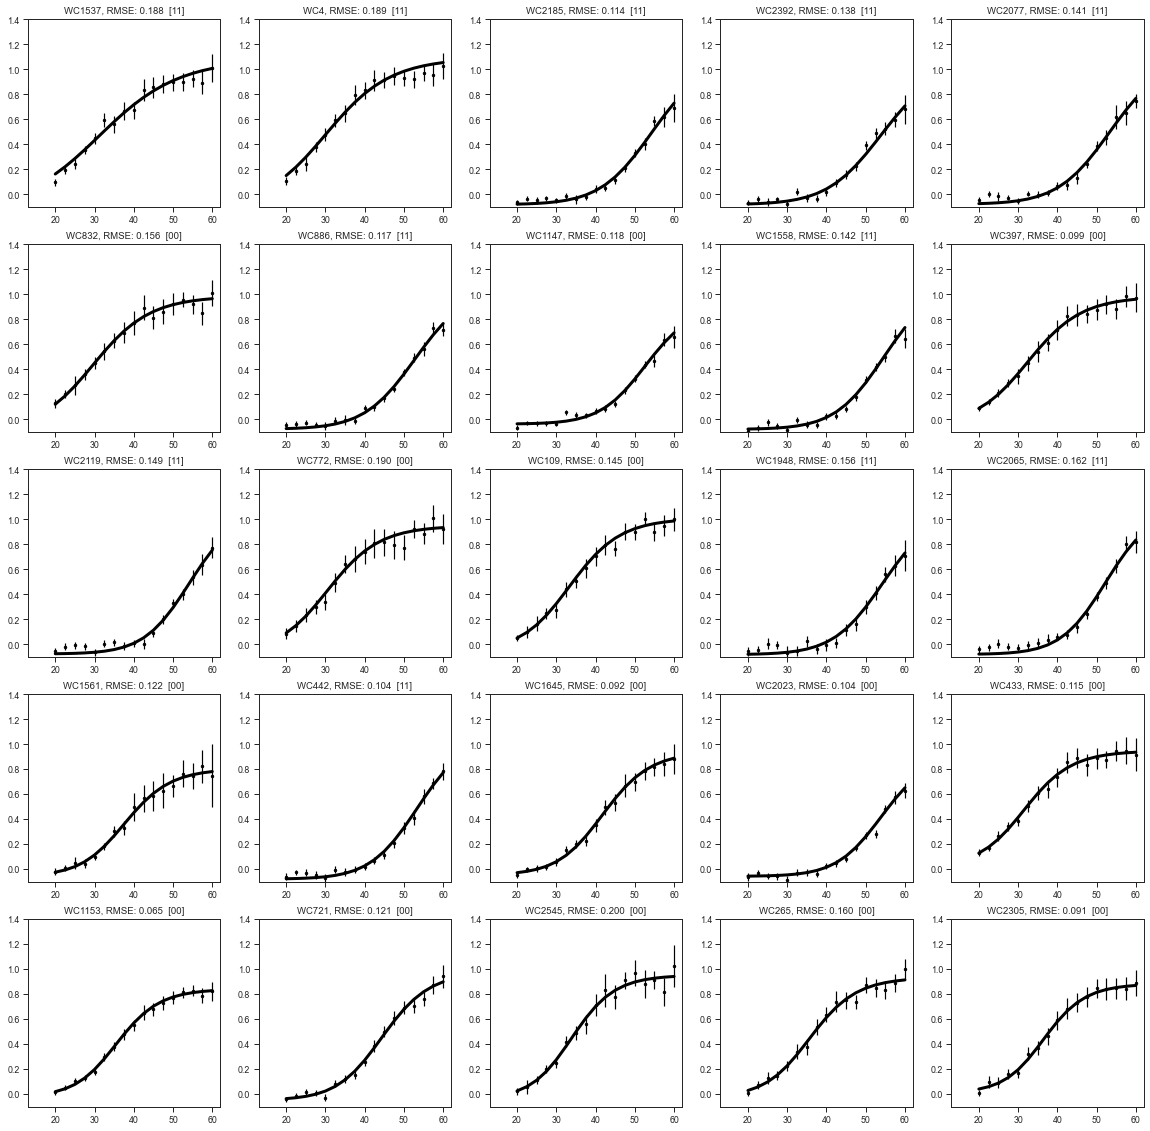

In [85]:
candidates = r1.sort_values('fit_vs_NUPACK_dH', ascending=False).query('ConstructType == "WC_6ntstem"').query('Tm > 273.15+25 & Tm < 273.15+55').query('rsqr > 0.97')[:25].index#.query('ddG_37_zscore_corrected < 1 & ddG_37_zscore_corrected > -1')[:25].index
fig, ax = plt.subplots(5,5,figsize=(20,20))
ax = ax.flatten()
for i,candidate in enumerate(candidates):
    plot_actual_and_expected_fit(r1.loc[candidate,:], ax=ax[i])

====Library Info===
 Series                   WatsonCrick
ConstructType             WC_6ntstem
Scaffold                          GC
Scaffoldposition              Bottom
RefSeq              GCAGAAGAAATTCTGC
dH_NUPACK                  -45.23629
dS_NUPACK                  -0.127782
Tm_NUPACK                  80.862693
dG_37_NUPACK               -5.571296
ConstructClass          Watson Crick
Name: WC2401, dtype: object

====Fit Info===
 dH                   -44.107716
Tm                    317.09203
dS                    -0.138939
dG_37                 -0.817006
dG_37_se_corrected      0.00204
Name: WC2401, dtype: object

79 clusters


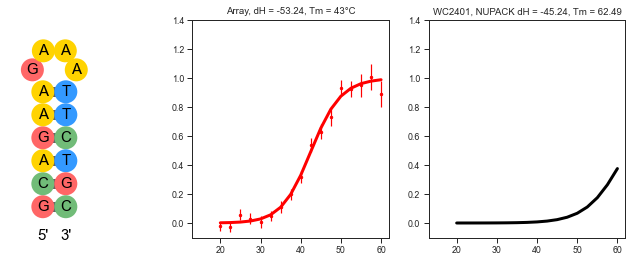

In [342]:
candidate = 'WC2401'

fig,ax = plt.subplots(1,3,figsize=(12,4))
draw_struct(df.loc[candidate, 'RefSeq'], df.loc[candidate, 'TargetStruct'],ax=ax[0])
plot_renorm_actual_and_expected_fit(r1.loc[candidate,:], ax=ax[1], c='red')
# plot_actual_and_expected_fit(r2.loc[candidate,:], ax=ax[1], conds=conds2, c='orange')
# plot_actual_and_expected_fit(r3.loc[candidate,:], ax=ax[1], conds=conds3, c='green')
ax[1].set_title('Array, dH = %.2f, Tm = %.0f°C' % (r1.loc[candidate,'dH'], r1.loc[candidate, 'Tm']-273.15))
plot_corrected_NUPACK_curve(annotation.loc[candidate,:], ax=ax[2])

print('====Library Info===\n', annotation.loc[candidate,:])
cols = ['dH', 'Tm', 'dS', 'dG_37', 'dG_37_se_corrected']
print('\n====Fit Info===\n', df.loc[candidate,cols])
print('\n%d clusters'%r1.loc[candidate,'n_clusters'])

save_fig('./fig/UV_melt_candidates/%s.pdf'%candidate)

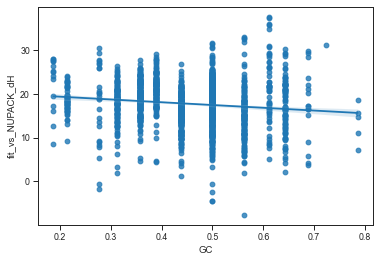

In [37]:
sns.regplot(y=df.fit_vs_NUPACK_dH, x=df.GC)
save_fig('./fig/diff_NUPACK/diff_NUPACK_vs_GC.pdf')

## Some properties of the design matrix

In [90]:
np.linalg.cond(feats)

3884492236342853.5

In [91]:
feats.sum(axis=0)

AA_TT      674
AC_GT      689
AG_CT      952
AGAAAT     429
AT_AT      682
CA_TG      687
CC_GG      554
CG_CG      723
CGAAAG     380
CT_AG      692
GA_TC     1181
GC_GC      887
GG_CC     1258
GGAAAC    1347
GT_AC     1186
TA_TA      672
TC_GA      678
TG_CA      937
TGAAAA     471
TT_AA      688
XA_TY      212
XC_GY      228
XG_CY     1989
XT_AY      198
dtype: int64

In [94]:
u,s,v = np.linalg.svd(feats)

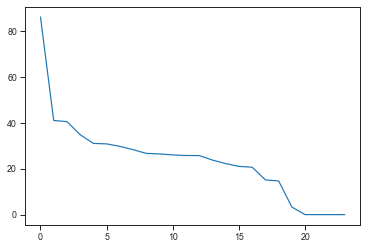

In [96]:
plt.plot(s)

## Evaluate high salt experiment

In [241]:
annotation = add_p_unfolded_NUPACK(annotation, T_celcius=60)

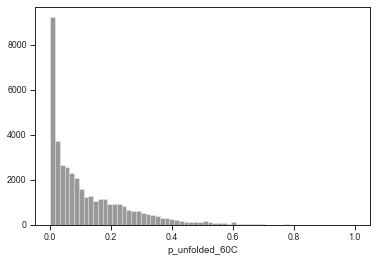

In [252]:
sns.distplot(annotation.p_unfolded_60C, kde=False, color='k')
plt.xlim([-0.05, 1.05])
save_fig('./fig/max_curve_1M_salt_pred/p_unfolded_60C_hist.pdf')

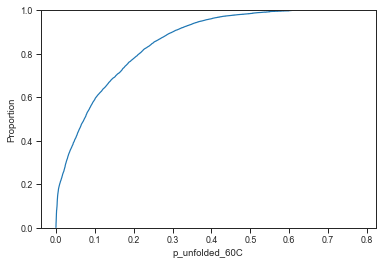

In [253]:
sns.ecdfplot(annotation.p_unfolded_60C)
save_fig('./fig/max_curve_1M_salt_pred/p_unfolded_60C_ecdf.pdf')

In [285]:
p_unfolded_thresholds = np.arange(0.25, 1.05, 0.05)
perc_variant_usable = {thresh: 100 * (df.p_unfolded_60C > thresh).sum() / len(df) for thresh in p_unfolded_thresholds}
n_variant_usable = {thresh: 100 * (df.p_unfolded_60C > thresh).sum() for thresh in p_unfolded_thresholds}

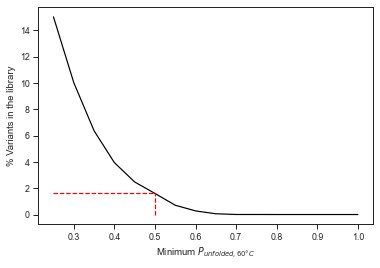

In [296]:
plt.plot(perc_variant_usable.keys(), perc_variant_usable.values(), 'k')
plt.plot(p_unfolded_thresholds[[0,5]], [1.6]*2, 'r--')
plt.plot([0.5]*2, [0,1.6], 'r--')
plt.xlabel('Minimum $P_{unfolded, 60°C}$')
plt.ylabel('% Variants in the library')
save_fig('./fig/max_curve_1M_salt_pred/percent_usable_variants.pdf')

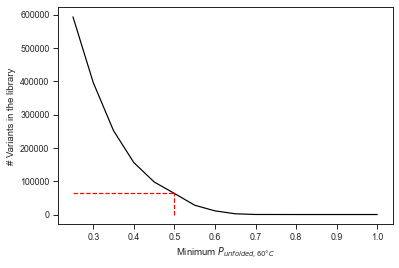

In [299]:
plt.plot(n_variant_usable.keys(), n_variant_usable.values(), 'k')
plt.plot(p_unfolded_thresholds[[0,5]], [63300]*2, 'r--')
plt.plot([0.5]*2, [0,63300], 'r--')
plt.xlabel('Minimum $P_{unfolded, 60°C}$')
plt.ylabel('# Variants in the library')
save_fig('./fig/max_curve_1M_salt_pred/n_usable_variants.pdf')

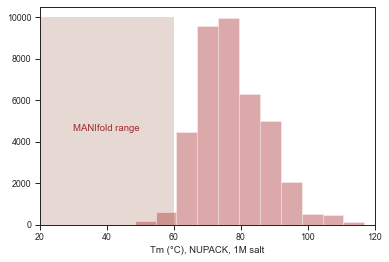

In [328]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.add_patch( Rectangle((20, 0),
                        40, 10000,
                        fc =(.9,.85,.83), 
                        ec ='none'))
sns.distplot(df.Tm_NUPACK, kde=False, color='brown')
plt.xlim([20,120])
plt.xlabel('Tm (°C), NUPACK, 1M salt')
plt.text(30, 4500, 'MANIfold range', color='brown')
save_fig('./fig/max_curve_1M_salt_pred/Tm_temperature_range.pdf')